In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
pd.set_option("display.max_colwidth", 200)

In [273]:
df1 = pd.read_csv('reddit_comments.csv', sep='\t')
df2 = pd.read_csv('reddit_comments2.csv', sep='\t')
df3 = pd.read_csv('reddit_comments3.csv', sep='\t')
df4 = pd.read_csv('reddit_comments4.csv', sep='\t')
df5 = pd.read_csv('reddit_comments5.csv', sep='\t')
df6 = pd.read_csv('reddit_comments6.csv', sep='\t')
df7 = pd.read_csv('reddit_comments7.csv', sep='\t')
df8 = pd.read_csv('reddit_comments8.csv', sep='\t')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
df = pd.DataFrame(df[['document','type']])
df.shape

(9492, 2)

In [274]:
types = np.array(list(df['type']))

In [275]:
# removing characters that are not letters
df['clean_doc'] = df['document'].str.replace("[^a-zA-Z#]", " ")
# removing all words which legth is equal or below 2
df['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# everything to lowercase
df['clean_doc'] = df['clean_doc'].apply(lambda x: x.lower())

In [276]:
stop_words = set(stopwords.words('english'))
new_stopwords = ['shit', 'fuck', 'deleted', 'think', 'like', 'removed', 'people', 'yeah']
new_stopwords_list = stop_words.union(new_stopwords)
stop_words = new_stopwords_list

# tokenization (chopping to pieces)
tokenized_doc = df['clean_doc'].apply(lambda x: x.split())

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# de-tokenization (joining from pieces)
detokenized_doc = []
for i in range(len(df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

df['clean_doc'] = detokenized_doc

In [277]:
vectorizer = TfidfVectorizer(stop_words='english', 
#                              max_features= 1000, # keep top 1000 terms 
                             max_df = 0.5, 
                             smooth_idf=True)

X = vectorizer.fit_transform(df['clean_doc'])

X.shape # check shape of the document-term matrix

(9492, 16830)

In [305]:
svd_model = TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

explained_variance = svd_model.explained_variance_ratio_.sum()

print(explained_variance)

len(svd_model.components_)

0.008639209374268578


3

In [310]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0], end=" ")
    print()

Topic 0: 
right know trump skin really good country white want make 
Topic 1: 
skin white products bleaching black tanning want lighter color darker 
Topic 2: 
trump skin collusion campaign data polling white manafort russian russia 


In [311]:
X_topics = svd_model.fit_transform(X)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X_topics)

# plt.figure(figsize=(7,5))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1],  
#             c = types,
#             s = 10, # size
#             edgecolor='none',
# #             label = types
#             )
# plt.legend()
# plt.show()


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 9492 samples in 0.000s...
[t-SNE] Computed neighbors for 9492 samples in 0.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9492
[t-SNE] Computed conditional probabilities for sample 2000 / 9492
[t-SNE] Computed conditional probabilities for sample 3000 / 9492
[t-SNE] Computed conditional probabilities for sample 4000 / 9492
[t-SNE] Computed conditional probabilities for sample 5000 / 9492
[t-SNE] Computed conditional probabilities for sample 6000 / 9492
[t-SNE] Computed conditional probabilities for sample 7000 / 9492
[t-SNE] Computed conditional probabilities for sample 8000 / 9492
[t-SNE] Computed conditional probabilities for sample 9000 / 9492
[t-SNE] Computed conditional probabilities for sample 9492 / 9492
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.321007
[t-SNE] Error after 300 iterations: 2.145534


In [312]:
dfa = pd.DataFrame(tsne_results)
dfa1 = pd.DataFrame(types)
dfa2 = dfa.join(dfa1, lsuffix='_')
dfa2.columns = ['one', 'two', 'type']
dfa2.shape

(9492, 3)

<Figure size 1440x1080 with 0 Axes>

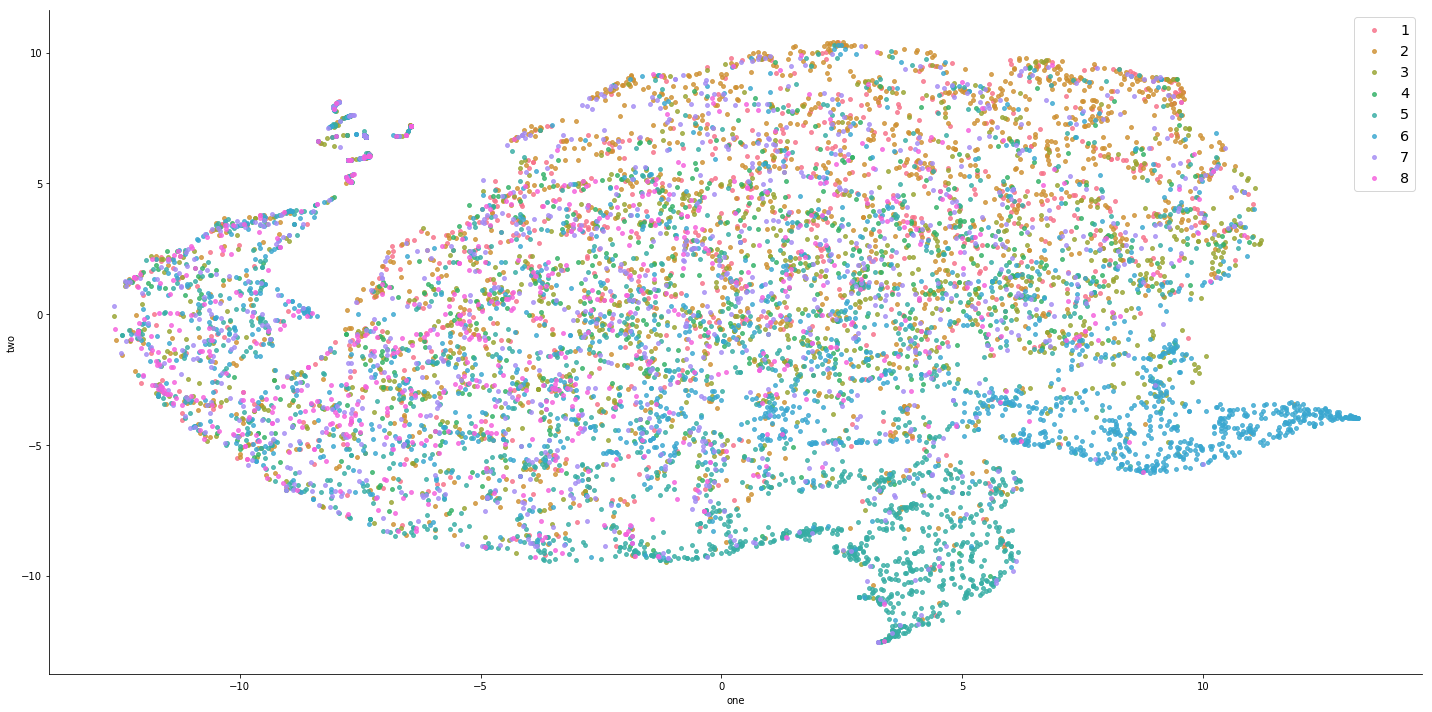

In [313]:
plt.figure(figsize=(20,15))
sns.set_palette("Set2")
sns.lmplot('one', 'two',  
            hue = 'type',
            data=dfa2,
            fit_reg = False,
           scatter_kws={"s": 15},
           size = 10, 
           aspect = 2,
           legend = False
            )

plt.legend(fontsize = 'x-large')
plt.show()